In [1]:
import pandas as pd
import os
import glob
from collections import defaultdict

def get_position_counts():
    # Path to the madden_ratings directory
    ratings_dir = "madden_ratings"
    
    # Check if directory exists
    if not os.path.exists(ratings_dir):
        print(f"Error: {ratings_dir} directory not found")
        return None
    
    # Find all Excel files in the directory
    excel_files = glob.glob(os.path.join(ratings_dir, "*.xls*"))
    
    if not excel_files:
        print(f"No Excel files found in {ratings_dir}")
        return None
    
    # Dictionary to store team data with position counts
    team_position_data = {}
    # Set to track all unique positions across all files
    all_positions = set()
    # Set to track all columns that start with O or o
    o_columns = set()
    # Set to track all columns that start with P, Po, or po
    p_columns = set()
    
    # Process each file
    for file_path in excel_files:
        try:
            # Extract year and team from filename
            filename = os.path.basename(file_path)
            
            # Skip files that contain "full" or "final" ratings
            if any(term in filename.lower() for term in ["full", "final"]):
                continue
                
            parts = filename.replace('.xlsx', '').replace('.xls', '').split('_')
            
            if len(parts) >= 3 and parts[0] == 'madden':
                year = parts[1]
                team = '_'.join(parts[2:])
                
                # Read the Excel file
                df = pd.read_excel(file_path)
                
                # Find position column (could be named differently in different files)
                position_cols = [col for col in df.columns if col in ['POSITION', 'Position', 'position', 'Pos', 'POS']]
                
                # Collect columns that start with O or o
                for col in df.columns:
                    if isinstance(col, str) and col.startswith(('O', 'o')):
                        o_columns.add(col)
                    # Collect columns that start with P, Po, or po
                    if isinstance(col, str) and (col.startswith('P') or col.startswith(('Po', 'po'))):
                        p_columns.add(col)
                
                if position_cols:
                    pos_column = position_cols[0]
                    
                    # Count positions
                    position_counts = df[pos_column].value_counts().to_dict()
                    
                    # Add positions to the set of all positions
                    all_positions.update(position_counts.keys())
                    
                    # Store data for this team
                    team_key = f"{team}_{year}"
                    team_position_data[team_key] = {
                        'team': team,
                        'year': year,
                        'positions': position_counts
                    }
                else:
                    print(f"No position column found in {filename}")
            
        except Exception as e:
            print(f"Error processing {file_path}: {str(e)}")
    
    return team_position_data, all_positions, o_columns, p_columns

# Run the function to get position data
team_data, unique_positions, o_columns, p_columns = get_position_counts()

# Print summary
if team_data:
    print(f"Processed {len(team_data)} team files")
    print(f"Found {len(unique_positions)} unique positions: {sorted(unique_positions)}")
    
    # Print example of one team's data
    example_team = next(iter(team_data))
    print(f"\nExample data for {example_team}:")
    print(team_data[example_team])
    
    # Print columns that start with O or o
    print(f"\nFound {len(o_columns)} columns that start with O or o:")
    print(sorted(o_columns))
    
    # Print columns that start with P, Po, or po
    print(f"\nFound {len(p_columns)} columns that start with P, Po, or po:")
    print(sorted(p_columns))


No position column found in madden_21_nfc_pro_bowl__madden_nfl_21_.xlsx


/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


No position column found in madden_19_madden_elites__madden_nfl_19_.xlsx


/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


No position column found in madden_20_nfc_pro_bowl__madden_nfl_20_.xlsx
No position column found in madden_15_pro_bowl_irvin.xlsx


/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


No position column found in madden_17_afc_pro_bowl__madden_nfl_17_.xlsx
No position column found in madden_19_nfc_pro_bowl__madden_nfl_19_.xlsx


/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/Users/ryanberg

No position column found in madden_20_2020_free_agent_frenzy_roster_3-31-2020.xlsx


/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


No position column found in madden_21_afc_pro_bowl__madden_nfl_21_.xlsx
No position column found in madden_19_madden_legends__madden_nfl_19_.xlsx


/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


No position column found in madden_20_afc_pro_bowl__madden_nfl_20_.xlsx


/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


No position column found in madden_15_pro_bowl_carter.xlsx


/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


No position column found in madden_19_afc_pro_bowl__madden_nfl_19_.xlsx
No position column found in madden_17_nfc_pro_bowl__madden_nfl_17_.xlsx


/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


No position column found in madden_20_bleacher_report_goat_sim_roster.xlsx


/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/Users/ryanberg

Processed 289 team files
Found 21 unique positions: ['C', 'CB', 'DT', 'FB', 'FS', 'HB', 'K', 'LE', 'LG', 'LOLB', 'LT', 'MLB', 'P', 'QB', 'RE', 'RG', 'ROLB', 'RT', 'SS', 'TE', 'WR']

Example data for buffalo_bills__madden_nfl_24__24:
{'team': 'buffalo_bills__madden_nfl_24_', 'year': '24', 'positions': {'WR': 8, 'CB': 8, 'DT': 7, 'TE': 5, 'FS': 5, 'HB': 4, 'LE': 4, 'RG': 3, 'SS': 3, 'LG': 3, 'RT': 3, 'MLB': 3, 'ROLB': 3, 'QB': 3, 'RE': 3, 'C': 2, 'LOLB': 2, 'LT': 2, 'P': 1, 'K': 1, 'FB': 1}}

Found 4 columns that start with O or o:
['OVERALL RATING', 'OVR', 'Overall', 'Overall Rating']

Found 24 columns that start with P, Po, or po:
['PASS BLOCK', 'PLAY ACTION', 'PLAY REC', 'POSITION', 'POWER MOVE', 'PRESS', 'PURSUIT', 'Pass Block', 'Pass Block Finesse', 'Pass Block Footwork', 'Pass Block Power', 'Pass Block Strength', 'Pass Blocking', 'Play Action', 'Play Recognition', 'Player Handedness', 'Player Handness', 'Player Portrait', 'Position', 'Power Moves', 'Press', 'Primary Key', 'Pursuit'

In [2]:
import re
print(unique_positions)
print(len(team_data))

# Clean position names by removing text in parentheses
cleaned_positions = set()
for position in unique_positions:
    # Check if position is a string (some might be NaN or other types)
    if isinstance(position, str):
        # Remove text in parentheses
        cleaned_position = re.sub(r'\s*\([^)]*\)', '', position).strip()
        cleaned_positions.add(cleaned_position)
    else:
        # Keep non-string values as is
        cleaned_positions.add(position)

# Remove any empty strings that might have been created
if '' in cleaned_positions:
    cleaned_positions.remove('')

print(f"Original unique positions: {len(unique_positions)}")
print(f"Cleaned unique positions: {len(cleaned_positions)}")
print("\nCleaned positions:")
print(sorted(cleaned_positions))

# Create a mapping from original positions to cleaned positions
position_mapping = {}
for position in unique_positions:
    if isinstance(position, str):
        cleaned_position = re.sub(r'\s*\([^)]*\)', '', position).strip()
        position_mapping[position] = cleaned_position

# Print some examples of the cleaning
print("\nExamples of position cleaning:")
examples = [pos for pos in unique_positions if isinstance(pos, str) and '(' in pos][:10]  # Show up to 10 examples
for original in examples:
    print(f"  {original} -> {position_mapping[original]}")


{'WR', 'RT', 'LE', 'MLB', 'P', 'RG', 'TE', 'ROLB', 'LG', 'C', 'RE', 'DT', 'FS', 'HB', 'SS', 'LOLB', 'LT', 'CB', 'FB', 'QB', 'K'}
289
Original unique positions: 21
Cleaned unique positions: 21

Cleaned positions:
['C', 'CB', 'DT', 'FB', 'FS', 'HB', 'K', 'LE', 'LG', 'LOLB', 'LT', 'MLB', 'P', 'QB', 'RE', 'RG', 'ROLB', 'RT', 'SS', 'TE', 'WR']

Examples of position cleaning:


In [3]:
print(team_data.keys())
print(team_data["buffalo_bills__madden_nfl_17__17"])

dict_keys(['buffalo_bills__madden_nfl_24__24', 'new_england_patriots__madden_nfl_19__19', 'carolina_panthers__madden_nfl_20__20', 'oakland_raiders__madden_nfl_18__18', 'buffalo_bills__madden_nfl_17__17', 'green_bay_packers__madden_nfl_23__23', 'tampa_bay_buccaneers_15', 'new_york_jets__madden_nfl_21__21', 'cincinnati_bengals__madden_nfl_24__24', 'san_francisco_49ers_(madden_nfl_16)_16', 'atlanta_falcons__madden_nfl_21__21', 'cleveland_browns__madden_nfl_17__17', 'buffalo_bills__madden_nfl_18__18', 'san_francisco_49ers_15', 'tampa_bay_buccaneers__madden_nfl_19__19', 'tennessee_titans__madden_nfl_19__19', 'green_bay_packers__madden_nfl_19__19', 'pittsburgh_steelers__madden_nfl_21__21', 'cincinnati_bengals__madden_nfl_18__18', 'cincinnati_bengals__madden_nfl_21__21', 'buffalo_bills__madden_nfl_23__23', 'los_angeles_chargers__madden_nfl_20__20', 'minnesota_vikings__madden_nfl_21__21', 'new_york_jets__madden_nfl_20__20', 'seattle_seahawks__madden_nfl_24__24', 'los_angeles_rams__madden_nfl_2


Teams with the most players in each position:
C: pittsburgh_steelers_(madden_nfl_16)_16 with 5 players
CB: green_bay_packers__madden_nfl_19__19 with 11 players
DT: dallas_cowboys__madden_nfl_19__19 with 9 players
FB: san_francisco_49ers_15 with 3 players
FS: los_angeles_chargers__madden_nfl_18__18 with 6 players
HB: new_york_giants__madden_nfl_17__17 with 7 players
K: buffalo_bills__madden_nfl_21__21 with 3 players
LE: atlanta_falcons__madden_nfl_21__21 with 6 players
LG: washington_redskins__madden_nfl_19__19 with 5 players
LOLB: washington_redskins__madden_nfl_18__18 with 6 players
LT: cincinnati_bengals__madden_nfl_24__24 with 4 players
MLB: new_york_giants__madden_nfl_21__21 with 9 players
P: new_england_patriots__madden_nfl_19__19 with 2 players
QB: pittsburgh_steelers__madden_nfl_21__21 with 5 players
RE: cincinnati_bengals__madden_nfl_23__23 with 6 players
RG: cincinnati_bengals__madden_nfl_24__24 with 4 players
ROLB: houston_texans__madden_nfl_19__19 with 5 players
RT: los_ang

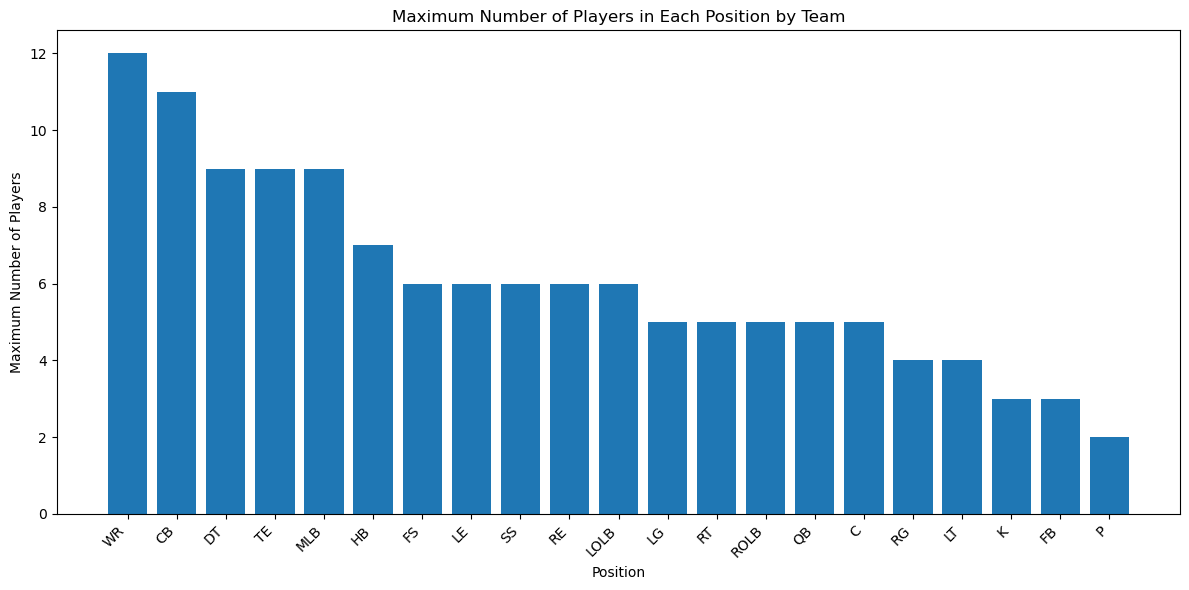


Statistics on position maximum counts:
Average maximum count: 6.10
Highest maximum count: 12
Lowest maximum count: 2


In [4]:
# Analyze position data across teams
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

# Dictionary to store position counts for each team
position_team_counts = defaultdict(lambda: defaultdict(int))

# Process each team's data
for team_name, team_data_dict in team_data.items():
    if "player_ratings" in team_name:
        continue
    # Check if the team data has a 'positions' dictionary
    if 'positions' in team_data_dict:
        positions = team_data_dict['positions']
        if positions:  # Check if the positions dictionary is not empty
            # Clean the positions using our position_mapping
            for position, count in positions.items():
                cleaned_position = position
                if isinstance(position, str) and position in position_mapping:
                    cleaned_position = position_mapping[position]
                # Update the count for this team and position
                position_team_counts[cleaned_position][team_name] += count

# Find the team with the most players for each position
position_max_teams = {}
position_max_counts = {}

for position, team_counts in position_team_counts.items():
    max_team = max(team_counts.items(), key=lambda x: x[1], default=(None, 0))
    if max_team[0]:  # If we found a team
        position_max_teams[position] = max_team[0]
        position_max_counts[position] = max_team[1]

# Display results
print("\nTeams with the most players in each position:")
for position in sorted(position_max_teams.keys()):
    team = position_max_teams[position]
    count = position_max_counts[position]
    print(f"{position}: {team} with {count} players")

# Visualize the distribution of maximum positions
if position_max_counts:
    # Sort positions by their maximum counts
    sorted_positions = sorted(position_max_counts.items(), key=lambda x: x[1], reverse=True)
    
    # Create a bar chart
    plt.figure(figsize=(12, 6))
    positions = [pos for pos, _ in sorted_positions]
    counts = [count for _, count in sorted_positions]
    
    plt.bar(positions, counts)
    plt.xlabel('Position')
    plt.ylabel('Maximum Number of Players')
    plt.title('Maximum Number of Players in Each Position by Team')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Calculate and display some statistics
    all_max_counts = list(position_max_counts.values())
    avg_max_count = sum(all_max_counts) / len(all_max_counts)
    max_max_count = max(all_max_counts)
    min_max_count = min(all_max_counts)
    
    print(f"\nStatistics on position maximum counts:")
    print(f"Average maximum count: {avg_max_count:.2f}")
    print(f"Highest maximum count: {max_max_count}")
    print(f"Lowest maximum count: {min_max_count}")


In [5]:
position_maximums = [
    ("C", 5),
    ("CB", 11),
    ("DT", 9),
    ("FB", 3),
    ("FS", 6),
    ("HB", 7),
    ("K", 3),
    ("LE", 6),
    ("LG", 5),
    ("LOLB", 6),
    ("LT", 4),
    ("MLB", 9),
    ("P", 2),
    ("QB", 5),
    ("RE", 6),
    ("RG", 4),
    ("ROLB", 5),
    ("RT", 5),
    ("SS", 6),
    ("TE", 9),
    ("WR", 12)
]

# Create columns for each position up to max + 1
columns = []
for position, max_count in position_maximums:
    for i in range(1, max_count + 2):  # +2 because range is exclusive
        columns.append(f"{position}{i}")

# Create DataFrame with these columns
df = pd.DataFrame(columns=columns)

# The DataFrame now has 149 columns total
# Example: C1, C2, C3, C4, C5, C6, CB1, CB2, ..., WR13
# Add team and win columns to the DataFrame
df['team_name'] = ""
df['year'] = 0
df['regular_season_wins'] = 0
df['playoff_wins'] = 0
df['total_wins'] = 0

# Load the team wins data to populate these columns later
try:
    # Assuming the wins data is in a CSV file
    wins_data = pd.read_csv('../../data/wins/NFL_Team_Wins_2015_2024.csv')
    print(f"Loaded wins data with {len(wins_data)} records")
    
    # Display the first few rows to verify the data
    print(wins_data.head())
except Exception as e:
    print(f"Error loading wins data: {e}")
    # Create an empty DataFrame if the file doesn't exist
    wins_data = pd.DataFrame(columns=['Team', 'Season', 'Regular Season Wins', 'Playoff Wins', 'Total Wins'])


Loaded wins data with 320 records
              Team  Season  Regular Season Wins  Playoff Wins  Total Wins
0  New York Giants    2015                    6             0           6
1  New York Giants    2016                   11             0          11
2  New York Giants    2017                    3             0           3
3  New York Giants    2018                    5             0           5
4  New York Giants    2019                    4             0           4


In [6]:
copy_of_df = df.copy()

In [7]:
# Function to map team names from Madden files to the names in the wins data
def normalize_team_name(team_name):
    # Dictionary to map team names from Madden files to standardized names
    team_mapping = {
        'arizona_cardinals': 'Arizona Cardinals',
        'atlanta_falcons': 'Atlanta Falcons',
        'baltimore_ravens': 'Baltimore Ravens',
        'buffalo_bills': 'Buffalo Bills',
        'carolina_panthers': 'Carolina Panthers',
        'chicago_bears': 'Chicago Bears',
        'cincinnati_bengals': 'Cincinnati Bengals',
        'cleveland_browns': 'Cleveland Browns',
        'dallas_cowboys': 'Dallas Cowboys',
        'denver_broncos': 'Denver Broncos',
        'detroit_lions': 'Detroit Lions',
        'green_bay_packers': 'Green Bay Packers',
        'houston_texans': 'Houston Texans',
        'indianapolis_colts': 'Indianapolis Colts',
        'jacksonville_jaguars': 'Jacksonville Jaguars',
        'kansas_city_chiefs': 'Kansas City Chiefs',
        'las_vegas_raiders': 'Las Vegas Raiders',
        'oakland_raiders': 'Las Vegas Raiders',
        'los_angeles_chargers': 'Los Angeles Chargers',
        'san_diego_chargers': 'Los Angeles Chargers',
        'los_angeles_rams': 'Los Angeles Rams',
        'st_louis_rams': 'Los Angeles Rams',
        'miami_dolphins': 'Miami Dolphins',
        'minnesota_vikings': 'Minnesota Vikings',
        'new_england_patriots': 'New England Patriots',
        'new_orleans_saints': 'New Orleans Saints',
        'new_york_giants': 'New York Giants',
        'new_york_jets': 'New York Jets',
        'philadelphia_eagles': 'Philadelphia Eagles',
        'pittsburgh_steelers': 'Pittsburgh Steelers',
        'san_francisco_49ers': 'San Francisco 49ers',
        'seattle_seahawks': 'Seattle Seahawks',
        'tampa_bay_buccaneers': 'Tampa Bay Buccaneers',
        'tennessee_titans': 'Tennessee Titans',
        'washington_commanders': 'Washington Commanders',
        'washington_football_team': 'Washington Commanders',
        'washington_redskins': 'Washington Commanders'
    }
    
    # Clean up the team name by removing any Madden-specific suffixes
    cleaned_name = re.sub(r'__madden_nfl_\d+_', '', team_name)
    cleaned_name = re.sub(r'__madden_ratings_\d+', '', cleaned_name)
    cleaned_name = re.sub(r'_madden_\d+', '', cleaned_name)
    cleaned_name = re.sub(r'\(madden_nfl_\d+\)', '', cleaned_name)
    cleaned_name = cleaned_name.strip('_')
    
    return team_mapping.get(cleaned_name.lower(), cleaned_name)

# Function to extract year from filename
def extract_year_from_filename(filename):
    # Try different patterns for year extraction
    patterns = [
        r'madden_(\d+)_',  # Standard pattern: madden_19_team.xlsx or madden_15_arizona_cardinals
        r'madden_nfl_(\d+)_',  # Pattern: madden_nfl_24_team.xlsx
        r'__madden_nfl_(\d+)_',  # Pattern with double underscore
        r'__madden_ratings_(\d+)',  # Another possible pattern
        r'\(madden_nfl_(\d+)\)',  # Pattern with parentheses
    ]
    
    for pattern in patterns:
        match = re.search(pattern, filename)
        if match:
            year = int(match.group(1))
            # Convert to full year (e.g., 15 -> 2015)
            return 2000 + year if year < 100 else year
    
    return None

# Function to extract team name from filename
def extract_team_from_filename(filename):
    # Try different patterns for team extraction
    patterns = [
        r'madden_\d+_(.*?)\.xlsx?',  # Standard pattern like madden_15_arizona_cardinals.xlsx
        r'madden_nfl_\d+_(.*?)\.xlsx?',  # NFL pattern
        r'(.*?)__madden_nfl_\d+_\.xlsx?',  # Pattern with team name first
        r'(.*?)_\(madden_nfl_\d+\)\.xlsx?',  # Pattern with parentheses
    ]
    
    for pattern in patterns:
        match = re.search(pattern, filename)
        if match:
            team_name = match.group(1)
            return team_name
    return None

# List to store all team data
all_team_data = []

# Process each Madden ratings file
madden_dir = "madden_ratings"
if os.path.exists(madden_dir):
    for filename in os.listdir(madden_dir):
        if filename.endswith(('.xlsx', '.xls')):
            file_path = os.path.join(madden_dir, filename)
            
            # Extract year and team from filename
            year = extract_year_from_filename(filename)
            team_name = extract_team_from_filename(filename)
            
            if year and team_name:
                # Skip Pro Bowl teams or other special teams
                if 'pro_bowl' in team_name.lower():
                    continue
                
                try:
                    # Read the Excel file
                    team_data = pd.read_excel(file_path, engine='openpyxl')
                    
                    # Create a new row for the DataFrame
                    new_row = {col: None for col in df.columns}
                    
                    # Set team and year
                    normalized_team_name = normalize_team_name(team_name)
                    new_row['team_name'] = normalized_team_name
                    new_row['year'] = year
                    if year == 2015:
                        print(f"-- 2015 Team name: {normalized_team_name}")
                    
                    # Find wins data for this team and year
                    team_wins = wins_data[(wins_data['Team'] == normalized_team_name) & 
                                         (wins_data['Season'] == year)]
                    
                    if not team_wins.empty:
                        new_row['regular_season_wins'] = team_wins.iloc[0]['Regular Season Wins']
                        new_row['playoff_wins'] = team_wins.iloc[0]['Playoff Wins']
                        new_row['total_wins'] = team_wins.iloc[0]['Total Wins']
                    
                    # Group players by position and sort by Overall rating
                    position_players = {}
                    
                    for _, player in team_data.iterrows():
                        # Check for different position column names
                        position = None
                        position_columns = ['Position', 'POSITION']
                        
                        for col in position_columns:
                            if col in player and not pd.isna(player[col]):
                                position = player[col]
                                break
                        
                        # Skip rows without position information
                        if position is None or pd.isna(position):
                            continue
                        
                        # Check for various possible overall rating column names
                        overall_value = None
                        overall_columns = ['OVERALL RATING', 'OVR', 'Overall', 'Overall Rating', 'OverallRating']
                        
                        for col in overall_columns:
                            if col in player and not pd.isna(player[col]):
                                overall_value = player[col]
                                break
                        
                        # Skip if no overall rating found
                        if overall_value is None:
                            continue
                        
                        if position not in position_players:
                            position_players[position] = []
                        
                        position_players[position].append(overall_value)
                    
                    # Sort players by overall rating (highest first) for each position
                    for position, ratings in position_players.items():
                        sorted_ratings = sorted(ratings, reverse=True)
                        
                        # Assign ratings to position columns
                        for i, rating in enumerate(sorted_ratings, 1):
                            col_name = f"{position}{i}"
                            if col_name in new_row:
                                new_row[col_name] = rating
                    
                    all_team_data.append(new_row)
                    
                except Exception as e:
                    print(f"Error processing {filename}: {e}")
    
    # Create DataFrame from all team data
    team_df = pd.DataFrame(all_team_data)
    
    # Merge with the main DataFrame
    #df = pd.concat([df, team_df], ignore_index=True)
    df = team_df
    
    print(f"Processed {len(all_team_data)} team files")
    print(f"Final DataFrame has {len(df)} rows and {len(df.columns)} columns")
    
    # Display a sample of the data
    print("\nSample of the populated DataFrame:")
    print(df[['team_name', 'year', 'regular_season_wins', 'total_wins']].head())
else:
    print(f"Directory {madden_dir} not found. Please run the madden_script.py first to download the data.")


/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


-- 2015 Team name: Tampa Bay Buccaneers


/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


-- 2015 Team name: San Francisco 49ers


/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


-- 2015 Team name: Carolina Panthers


/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


-- 2015 Team name: New Orleans Saints


/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


-- 2015 Team name: Chicago Bears
-- 2015 Team name: madden_nfl_15_-_full_player_ratings


/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


-- 2015 Team name: Tennessee Titans
-- 2015 Team name: Seattle Seahawks


/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


-- 2015 Team name: Philadelphia Eagles


/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


-- 2015 Team name: New England Patriots


/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


-- 2015 Team name: Buffalo Bills
-- 2015 Team name: Houston Texans
-- 2015 Team name: Las Vegas Raiders


/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


-- 2015 Team name: Indianapolis Colts


/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


-- 2015 Team name: Los Angeles Chargers
-- 2015 Team name: Minnesota Vikings


/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


-- 2015 Team name: Cleveland Browns


/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


-- 2015 Team name: Kansas City Chiefs
-- 2015 Team name: New York Giants


/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


-- 2015 Team name: New York Jets


/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


-- 2015 Team name: Dallas Cowboys
-- 2015 Team name: Arizona Cardinals


/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


-- 2015 Team name: Baltimore Ravens


/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


-- 2015 Team name: Jacksonville Jaguars
-- 2015 Team name: Atlanta Falcons


/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


-- 2015 Team name: Green Bay Packers


/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


-- 2015 Team name: Miami Dolphins


/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


-- 2015 Team name: Pittsburgh Steelers


/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


-- 2015 Team name: Denver Broncos
-- 2015 Team name: Cincinnati Bengals


/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


-- 2015 Team name: Detroit Lions


/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


-- 2015 Team name: Los Angeles Rams


/Users/ryanbergmac/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


-- 2015 Team name: Washington Commanders
Processed 305 team files
Final DataFrame has 305 rows and 154 columns

Sample of the populated DataFrame:
              team_name  year  regular_season_wins  total_wins
0         Buffalo Bills  2024                 13.0        15.0
1  New England Patriots  2019                 12.0        12.0
2     Carolina Panthers  2020                  5.0         5.0
3     Las Vegas Raiders  2018                  4.0         4.0
4         Buffalo Bills  2017                  9.0         9.0


In [8]:
test_df = df.copy()

# Define the list of 32 NFL team names
nfl_teams = [
    'Arizona Cardinals', 'Atlanta Falcons', 'Baltimore Ravens', 'Buffalo Bills',
    'Carolina Panthers', 'Chicago Bears', 'Cincinnati Bengals', 'Cleveland Browns',
    'Dallas Cowboys', 'Denver Broncos', 'Detroit Lions', 'Green Bay Packers',
    'Houston Texans', 'Indianapolis Colts', 'Jacksonville Jaguars', 'Kansas City Chiefs',
    'Las Vegas Raiders', 'Los Angeles Chargers', 'Los Angeles Rams', 'Miami Dolphins',
    'Minnesota Vikings', 'New England Patriots', 'New Orleans Saints', 'New York Giants',
    'New York Jets', 'Philadelphia Eagles', 'Pittsburgh Steelers', 'San Francisco 49ers',
    'Seattle Seahawks', 'Tampa Bay Buccaneers', 'Tennessee Titans', 'Washington Commanders'
]

# Print the number of teams before filtering
print(f"Number of teams before filtering: {len(df)}")

# Get the list of teams before filtering
original_teams = set(df['team_name'].unique())

# Create a mapping for team name corrections
team_name_corrections = {
    'jacksonville_jagaurs': 'Jacksonville Jaguars',
    'washington_football': 'Washington Commanders'
}

# Apply team name corrections
df['team_name'] = df['team_name'].replace(team_name_corrections)

# Filter out teams that are not in the NFL teams list
df_filtered = df[df['team_name'].isin(nfl_teams)]

# Print the number of teams after filtering
print(f"Number of teams after filtering: {len(df_filtered)}")

# Find and print the removed teams
removed_teams = set(df['team_name'].unique()) - set(nfl_teams)
if len(removed_teams) > 0:
    print("\nRemoved teams:")
    for team in removed_teams:
        print(f"- {team}")

# Update the dataframe
df = df_filtered


Number of teams before filtering: 305
Number of teams after filtering: 288

Removed teams:
- madden_nfl_19_-_full_player_ratings_1
- madden_nfl_15_-_full_player_ratings
- 2020_free_agent_frenzy_roster_3-31-2020
- madden_nfl_21_final_ratings
- madden_elites
- madden_nfl_23_player_ratings
- madden_nfl_20_-_full_player_ratings
- madden_nfl_17_-_full_player_ratings
- madden_nfl_22_final_roster
- madden_nfl_21_-_full_player_ratings
- madden_nfl_18_-_full_player_ratings
- bleacher_report_goat_sim_roster
- madden_legends
- madden_nfl_21_-_full_rookies
- maddennfl24fullplayerratings
- madden_nfl_16_-_full_player_ratings
- madden_nfl_20_final_ratings


In [9]:
# Check how many times each team appears in the dataset
team_counts = df['team_name'].value_counts().sort_values(ascending=False)
print("Number of entries per team:")
print(team_counts)

# Find teams with 8 entries (one year might be missing)
teams_with_8_entries = team_counts[team_counts == 8].index.tolist()
if teams_with_8_entries:
    print(f"\nTeams with 8 entries (potentially missing a year):")
    for team in teams_with_8_entries:
        # Get the years for this team
        team_years = df[df['team_name'] == team]['year'].sort_values().unique()
        print(f"\n{team} appears in years: {', '.join(map(str, team_years))}")
        
        # Find the missing year(s)
        all_years = sorted(df['year'].unique())
        missing_years = set(all_years) - set(team_years)
        if missing_years:
            print(f"Missing year(s): {', '.join(map(str, sorted(missing_years)))}")
else:
    print("\nNo teams with exactly 8 entries found.")

# Print the range of years in the dataset for reference
print(f"\nDataset covers years from {df['year'].min()} to {df['year'].max()}")


Number of entries per team:
team_name
Buffalo Bills            9
New England Patriots     9
Carolina Panthers        9
Las Vegas Raiders        9
Green Bay Packers        9
Tampa Bay Buccaneers     9
New York Jets            9
Cincinnati Bengals       9
San Francisco 49ers      9
Atlanta Falcons          9
Cleveland Browns         9
Tennessee Titans         9
Pittsburgh Steelers      9
Los Angeles Chargers     9
Minnesota Vikings        9
Seattle Seahawks         9
Los Angeles Rams         9
Houston Texans           9
New York Giants          9
Dallas Cowboys           9
Washington Commanders    9
Miami Dolphins           9
Jacksonville Jaguars     9
Baltimore Ravens         9
Chicago Bears            9
New Orleans Saints       9
Denver Broncos           9
Arizona Cardinals        9
Philadelphia Eagles      9
Detroit Lions            9
Kansas City Chiefs       9
Indianapolis Colts       9
Name: count, dtype: int64

No teams with exactly 8 entries found.

Dataset covers years from 2015 

In [10]:
# Fill NaN values with 0
df = df.fillna(0)

# Print the DataFrame after filling NaN values
# print("DataFrame after filling NaN values with 0:")
# print(df.head())

# Get all position columns (like QB1, QB2, etc.)
position_prefixes = set()
for col in df.columns:
    # Extract position prefix (e.g., 'QB' from 'QB1')
    match = re.match(r'([A-Z]+)[0-9]+', col)
    if match:
        position_prefixes.add(match.group(1))

print(f"\nFound {len(position_prefixes)} position types: {', '.join(sorted(position_prefixes))}")

# Find teams with all zeros for a given position
print("\nTeams with all zeros for a position:")
# Counter to track how many teams have empty positions
empty_position_counts = {prefix: 0 for prefix in position_prefixes}

for team_idx, team_row in df.iterrows():
    team_name = team_row['team_name']
    year = team_row['year']
    
    for prefix in position_prefixes:
        # Get all columns for this position
        pos_cols = [col for col in df.columns if re.match(f'{prefix}[0-9]+', col)]
        
        if not pos_cols:
            continue
            
        # Check if all values for this position are 0
        if all(team_row[col] == 0 for col in pos_cols):
            print(f"Team: {team_name} ({year}) - Position: {prefix} - All {len(pos_cols)} slots are 0")
            empty_position_counts[prefix] += 1

# Print summary of teams with empty positions
print("\nSummary of teams with empty positions:")
for prefix, count in sorted(empty_position_counts.items(), key=lambda x: x[1], reverse=True):
    if count > 0:
        print(f"{prefix}: {count} teams")

print(f"\nTotal teams with at least one empty position: {sum(1 for _, team_row in df.iterrows() if any(all(team_row[col] == 0 for col in [c for c in df.columns if re.match(f'{prefix}[0-9]+', c)]) for prefix in position_prefixes))}")


Found 21 position types: C, CB, DT, FB, FS, HB, K, LE, LG, LOLB, LT, MLB, P, QB, RE, RG, ROLB, RT, SS, TE, WR

Teams with all zeros for a position:
Team: Green Bay Packers (2023) - Position: FB - All 4 slots are 0
Team: New York Jets (2021) - Position: FB - All 4 slots are 0
Team: Cincinnati Bengals (2024) - Position: FB - All 4 slots are 0
Team: Tennessee Titans (2019) - Position: FB - All 4 slots are 0
Team: New York Jets (2020) - Position: FB - All 4 slots are 0
Team: Seattle Seahawks (2024) - Position: FB - All 4 slots are 0
Team: Los Angeles Rams (2024) - Position: FB - All 4 slots are 0
Team: Washington Commanders (2018) - Position: FB - All 4 slots are 0
Team: Miami Dolphins (2019) - Position: FB - All 4 slots are 0
Team: Jacksonville Jaguars (2023) - Position: FB - All 4 slots are 0
Team: Cincinnati Bengals (2023) - Position: FB - All 4 slots are 0
Team: Arizona Cardinals (2021) - Position: FB - All 4 slots are 0
Team: Tampa Bay Buccaneers (2020) - Position: FB - All 4 slots a

In [12]:
# Export DataFrame to Excel for inspection
output_path = "../../data/madden_data_processed.xlsx"
df.to_excel(output_path, index=False)
print(f"\nDataFrame exported to {output_path}")



DataFrame exported to ../../data/madden_data_processed.xlsx
